# Tutorial de Ciencias de Datos (UdeSA) 2025
## Tutorial 2 - Parte 1

- Conocer qué son y como hacer Heatmaps

# Introducción a los Heatmaps (Mapas de Calor)

Un **heatmap** o *mapa de calor* es una representación gráfica que utiliza una escala de colores para mostrar la magnitud de los valores en una matriz o tabla.  
La idea central es **visualizar patrones, correlaciones o concentraciones de datos** de forma intuitiva, donde cada color refleja la intensidad de un valor.

---

## ¿Para qué se usan?
- **Análisis exploratorio de datos (EDA):** permite detectar rápidamente relaciones entre variables.
- **Matrices de correlación:** mostrar qué tan relacionadas están dos variables entre sí.
- **Distribuciones geográficas o espaciales:** intensidad de eventos en un mapa físico (ej. calorías en regiones, densidad poblacional).
- **Seguimiento de actividades o comportamientos:** por ejemplo, actividad de usuarios a lo largo del tiempo.

---

## Ventajas
- Fácil de interpretar visualmente.  
- Resalta *clusters* o concentraciones que no se ven en tablas numéricas.  
- Muy útil como primer paso antes de aplicar modelos estadísticos o de machine learning.  

---

En este tutorial vamos a practicar con `pandas`, `numpy`, `matplotlib` y `seaborn` para construir heatmaps que nos ayuden a explorar y comprender mejor los datos.

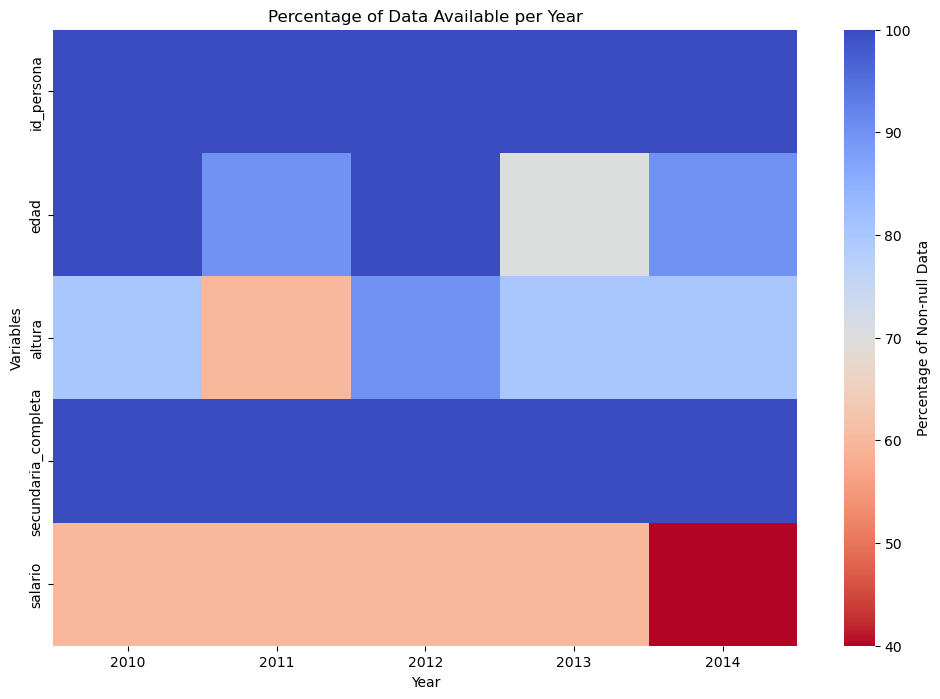

In [30]:
"""
# Tutorial de Ciencias de Datos
## Tutorial 3, Parte I
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Fijamos la semilla para obtener resultados reproducibles
np.random.seed(123)

# Creamos un arreglo de números enteros del 1 al 10 para identificar a 10 personas
personas = np.arange(1, 11)

# Creamos un arreglo de años desde 2010 hasta 2014
anios = np.arange(2010, 2015)

# Creamos un DataFrame con todas las combinaciones posibles de personas y años
panel = pd.DataFrame([(persona, anio) for persona in personas for anio in anios], 
                     columns=['id_persona', 'anio'])

# Generamos edades aleatorias entre 18 y 64 años para cada observación
panel['edad'] = np.random.randint(18, 65, size=len(panel))

# Generamos alturas aleatorias con una distribución normal, media de 170cm y desviación estándar de 10cm
panel['altura'] = np.round(np.random.normal(170, 10, size=len(panel)), 1)

# Creamos una variable dummy para secundaria completa (0 o 1), con probabilidad del 70% para el valor 1
panel['secundaria_completa'] = np.random.choice([0, 1], size=len(panel), p=[0.3, 0.7])

# Generamos salarios aleatorios siguiendo una distribución normal con media de 60,000 y desviación estándar de 15,000
panel['salario'] = np.round(np.random.normal(60000, 15000, size=len(panel)), 2)

# Introducimos valores faltantes (NaN) en cada columna, según los porcentajes especificados
for col, prop in {'edad': 0.10, 'altura': 0.23, 'secundaria_completa': 0.01, 'salario': 0.45}.items():
    # Calculamos la cantidad de valores faltantes a introducir en la columna actual
    n_missing = int(np.floor(prop * len(panel)))
    # Seleccionamos índices aleatorios donde insertaremos los valores faltantes
    missing_indices = np.random.choice(panel.index, size=n_missing, replace=False)
    # Asignamos valores faltantes (NaN) a los índices seleccionados en la columna actual
    panel.loc[missing_indices, col] = np.nan


# Calcular el porcentaje de datos no nulos por año
percentage_data = panel.groupby('anio').apply(lambda x: x.notnull().mean() * 100)

# Eliminar las columnas innecesarias antes de graficar
percentage_data = percentage_data.drop(columns=['anio'])  # Eliminar 'anio' del DataFrame calculado

# 2. Crear el heatmap sin etiquetas en las celdas
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_data.T, annot=False, cmap="coolwarm_r", cbar_kws={'label': 'Percentage of Non-null Data'})
plt.title("Percentage of Data Available per Year")
plt.xlabel("Year")
plt.ylabel("Variables")
plt.show()